<a href="https://colab.research.google.com/github/yexf308/MAT592/blob/main/Module3/PyTorch_and_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pylab inline 
import pandas as pd
from scipy import linalg
import scipy

import torch
import torch.nn as nn
import torch.nn.functional as F

Populating the interactive namespace from numpy and matplotlib


# Logistic regression in PyTorch


In [2]:
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


### Binary Logistic Regression: 9 or not 9


In [3]:
Xtr                   = train_X[0:6000, :]
train_y_part          = train_y[0:6000]
Ytr                   = zeros(train_y_part.size)
Ytr[train_y_part==9]=1

Xte                   = test_X[0:1000,:]
test_y_part           = test_y[0:1000]
Yte  = zeros(test_y_part.size)
Yte[test_y_part==9]=1

Xtr = torch.from_numpy(Xtr)
Xte = torch.from_numpy(Xte)

Xtrain = Xtr.view(-1, 28*28)/256
Xtest  = Xte.view(-1, 28*28)/256

Ytr = torch.from_numpy(Ytr)
Yte = torch.from_numpy(Yte)

In [4]:
#Feel free to play around with these :) 

batch_size = 100
epochs = 10
input_dim = 784
output_dim = 1 #binary classification problem first 
lr_rate = 0.001

#setting up our model - one way to set up models in PyTorch is with nn.Sequential 

binaryMNIST = nn.Sequential(
    nn.Linear(784, 1), 
    nn.Sigmoid())


In [5]:
#We can look at the untrained weights in the model if we want:
print('\n\nModel params:')
for param in binaryMNIST.parameters():
    print(param)



Model params:
Parameter containing:
tensor([[-2.2956e-02, -4.3506e-03, -3.7787e-03, -2.6011e-02,  1.8904e-02,
          1.4502e-02, -1.4677e-02, -3.5072e-03, -2.1450e-02, -2.9399e-02,
          3.3719e-02,  2.5092e-02,  3.0730e-02,  6.3172e-03,  5.6465e-03,
          3.4160e-02,  8.3831e-03, -1.8042e-02, -1.3260e-02, -2.5713e-02,
          3.0248e-02,  2.3237e-02,  1.0855e-02,  9.6578e-03,  4.3952e-03,
          1.4134e-02, -2.3823e-02, -2.3152e-02, -3.0001e-02,  2.2481e-02,
          2.0184e-02,  6.5491e-03, -1.2269e-02, -1.8810e-02,  1.2524e-02,
          2.0135e-03, -2.0958e-02, -5.5186e-03, -6.7462e-03,  1.2036e-02,
         -1.2404e-02, -6.3908e-03, -8.1926e-03,  2.7559e-02, -1.1748e-02,
         -3.7573e-03,  2.9346e-03, -7.1540e-03, -8.1423e-03, -1.1910e-02,
         -1.7798e-02, -2.9285e-02, -1.4559e-02, -3.4594e-02,  1.5188e-02,
         -3.5142e-02,  3.3703e-02,  3.1787e-02,  3.2395e-02,  6.2849e-03,
          3.7875e-04,  1.4451e-02,  6.7097e-03,  2.2632e-02, -1.4374e-02,


In [6]:

#set up the loss - binary cross entropy is already implemented by Pytorch
Loss = torch.nn.BCELoss()
#using SGD - we have to tell it what we're going to be optimizing 
optimizer = torch.optim.SGD(binaryMNIST.parameters(), lr=lr_rate)

arr = np.arange(Xtrain.shape[0])
for epoch in range(int(epochs)):
  np.random.shuffle(arr)
  print(epoch)
  for i in arr:
    Xtrain_i = Xtrain[i]
    output_i = binaryMNIST(Xtrain_i)
    loss_i  = Loss(torch.squeeze(output_i), Ytr[0].to(torch.float32))
    optimizer.zero_grad() #make sure to zero gradients out  
    loss_i.backward()
    optimizer.step()



0
1
2
3
4
5
6
7
8
9


In [7]:
correct = 0
for i in range(Xtest.shape[0]):
  Xtest_i = Xtest[i]
  outputs = binaryMNIST(Xtest_i)
  correct += np.sum(torch.squeeze(outputs).round().detach().numpy() == Yte[i].detach().numpy())

accuracy = 100 * correct/Xtest.shape[0]
print("Epoch: {}. Train Loss: {}. Validation Accuracy: {}.".format(epoch, loss_i.item(), accuracy))

Epoch: 9. Train Loss: 0.0016785635380074382. Validation Accuracy: 90.6.


In [8]:
#A second common way to setup models in PyTorch is with a model class 

class MNISTLogisticRegression(torch.nn.Module):

    def __init__(self, output_dim = 2):
      #input dim is 784 because that is the size of a flattened MNIST image
        super(MNISTLogisticRegression, self).__init__()
        #w and b will initialized with gradient tracking turned on by nn.Module 
        self.linear1 = torch.nn.Linear(784, output_dim)

    def forward(self, x):
        return self.linear1(x)

# MULTICLASS LOGISTIC REGRESSION
TBD in HW

# Neural Networks

In [9]:
import torch.optim as optim
import torchvision.datasets as datasets
from torchvision import transforms
import torchvision.utils
from tqdm import tqdm

In [10]:
mnist = datasets.MNIST(root="./data", train=True, download=True, transform=transforms.ToTensor())


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [11]:
mnist

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

## Constructing the DataLoader
The PyTorch DataLoader class is an efficient implementation of an iterator that can perform useful preprocessing and returns batches of elements. Here, we use its ability to batch and shuffle data, but DataLoaders are capable of much more.

Note that each time we iterate over a DataLoader, it starts again from the beginning.

Below we use `torchvision.utils.make_grid()` to show a sample batch of inputs.

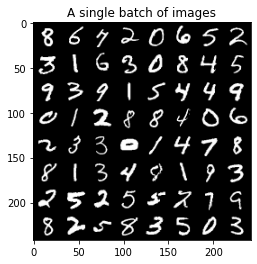

In [12]:
data_loader = torch.utils.data.DataLoader(mnist, batch_size=64, shuffle=True)

# Show one batch of images. Each batch of images has shape [batch_size, 1, 28, 28],
# where 1 is the "channels" dimension of the image.
for images,labels in data_loader:
    grid_img = torchvision.utils.make_grid(images)
    plt.imshow(grid_img.permute(1, 2, 0))
    plt.title("A single batch of images")
    break

## Define the network 
Here we define a simple 1-hidden-layer neural network for classification on MNIST. It takes a parameter that determines the hidden size of the hidden layer.



In [13]:
class MNISTNetwork(nn.Module):
    def __init__(self, hidden_size):
        super().__init__()
        self.linear_0 = nn.Linear(784, hidden_size)
        self.linear_1 = nn.Linear(hidden_size, 10)
        
    def forward(self, inputs):
        x = self.linear_0(inputs)
        x = torch.sigmoid(x)
        return self.linear_1(x)

### Instantiating the Networks
We will consider three networks.
- One that only has a single hidden unit and all of its weights are initialized to exactly 0.
- One that has 64 hidden units and all of its weights are initialized to exactly 0.
- One that has 64 hidden units and the weights are initialized using Torch's default, Kaiming Uniform initialization.

A bit review here

In the code below, we utilize some important PyTorch methods which you'll want to be familiar with. This includes:

- `torch.nn.Module.parameters()`: Returns an iterator over module parameters (i.e. for passing to an optimizer that will update those parameters).

- `torch.Tensor.view()`: Returns a view into the original Tensor. The result of this method shares the same underlying data as the input Tensor. This avoids copying the data, which means it can be mnore efficient, but it also means that when the original Tensor is modified, so is the view!

- `torch.Tensor.item()`: Returns the value of a single-element Tensor as a standard Python number. This only works for tensors with one element. For other cases, see `torch.Tensor.tolist()`.

- `torch.Tensor.backward()`: Computes the gradients of current tensor wrt the graph leaves (note that this is only called if `Tensor.requires_grad` is True, which is the case by default). After calling this, a Tensor's `.grad` attribute is updated with the current gradients. These are used, for example, when calling `.step()` method of an optimizer.

- `torch.optim.Optimizer.zero_grad()`: Sets the gradients of all variables to zero. This should be conducted before each step of an optimization procedure (i.e., for each batch of training a DNN). If `.zero_grad()` is not called, gradients accumulate (add) over iterations.

In [14]:
small_net = MNISTNetwork(1)
large_net = MNISTNetwork(64)
large_net_rand = MNISTNetwork(64)

# initialize the first two parameters as zeros. 
for p in zip(small_net.parameters(), large_net.parameters()):
    p1, p2 = p
    p1.data = torch.zeros_like(p1.data)
    p2.data = torch.zeros_like(p2.data)

### Training
We will train all three networks simulateneously using the same learning rate. After each epoch, we print the current loss of each network.



In [16]:
epochs = 32

optimizer_small = optim.Adam(small_net.parameters(), lr=5e-3)
optimizer_large = optim.Adam(large_net.parameters(), lr=5e-3)
optimizer_large_rand = optim.Adam(large_net_rand.parameters(), lr=5e-3)

for i in range(epochs):
    loss_small_epoch = 0.
    loss_large_epoch = 0.
    loss_large_rand_epoch = 0.
    
    for batch in tqdm(data_loader):
        images, labels = batch
        images, labels = images, labels
        
        images = images.view(-1, 784)
        
        optimizer_small.zero_grad()
        optimizer_large.zero_grad()
        optimizer_large_rand.zero_grad()
        
        y_small = small_net(images)
        y_large = large_net(images)
        y_large_rand = large_net_rand(images)
        
        loss_small = F.cross_entropy(y_small, labels)
        loss_large = F.cross_entropy(y_large, labels)
        loss_large_rand = F.cross_entropy(y_large_rand, labels)
        
        loss_small_epoch += loss_small.item()
        loss_large_epoch += loss_large.item()
        loss_large_rand_epoch += loss_large_rand.item()
        
        loss_small.backward()
        loss_large.backward()
        loss_large_rand.backward()
        
        optimizer_small.step()
        optimizer_large.step()
        optimizer_large_rand.step()
        
    print("Small Loss:", loss_small_epoch / len(data_loader))
    print("Large Loss:", loss_large_epoch / len(data_loader))
    print("Large rand Loss:", loss_large_rand_epoch / len(data_loader))

100%|██████████| 938/938 [00:08<00:00, 109.48it/s]


Small Loss: 1.941645417259192
Large Loss: 1.7927322509700556
Large rand Loss: 0.3251739103815703


100%|██████████| 938/938 [00:09<00:00, 98.11it/s] 


Small Loss: 1.7697478836533358
Large Loss: 1.6247666930593152
Large rand Loss: 0.14446913373908762


100%|██████████| 938/938 [00:08<00:00, 109.77it/s]


Small Loss: 1.7448063354248178
Large Loss: 1.5627654704457916
Large rand Loss: 0.10611277820715216


100%|██████████| 938/938 [00:08<00:00, 113.09it/s]


Small Loss: 1.7317689912659782
Large Loss: 1.5348670523303913
Large rand Loss: 0.08401530221311142


100%|██████████| 938/938 [00:08<00:00, 112.17it/s]


Small Loss: 1.7118762335035085
Large Loss: 1.5209577177633355
Large rand Loss: 0.07047121067405311


100%|██████████| 938/938 [00:08<00:00, 111.67it/s]


Small Loss: 1.6799983164903198
Large Loss: 1.5139142246897033
Large rand Loss: 0.05801754009260583


100%|██████████| 938/938 [00:08<00:00, 109.11it/s]


Small Loss: 1.6440086155049582
Large Loss: 1.5155868985251324
Large rand Loss: 0.050158843986376295


100%|██████████| 938/938 [00:08<00:00, 111.33it/s]


Small Loss: 1.6119321611390185
Large Loss: 1.5116903849247931
Large rand Loss: 0.04338907138821778


100%|██████████| 938/938 [00:08<00:00, 113.32it/s]


Small Loss: 1.5865041637725668
Large Loss: 1.5068084535314077
Large rand Loss: 0.03544882006324165


100%|██████████| 938/938 [00:08<00:00, 113.05it/s]


Small Loss: 1.5702022588583453
Large Loss: 1.50481392427294
Large rand Loss: 0.03360624802972762


100%|██████████| 938/938 [00:08<00:00, 111.89it/s]


Small Loss: 1.5599518663593446
Large Loss: 1.5018442326517247
Large rand Loss: 0.028560741095002423


100%|██████████| 938/938 [00:08<00:00, 113.08it/s]


Small Loss: 1.5530002766580724
Large Loss: 1.5070315271552437
Large rand Loss: 0.02456954246084553


100%|██████████| 938/938 [00:09<00:00, 99.65it/s] 


Small Loss: 1.5438304953991986
Large Loss: 1.5025534571360932
Large rand Loss: 0.021507171907962096


100%|██████████| 938/938 [00:08<00:00, 110.70it/s]


Small Loss: 1.538390941711377
Large Loss: 1.5045873823958928
Large rand Loss: 0.02111594665971553


100%|██████████| 938/938 [00:08<00:00, 105.07it/s]


Small Loss: 1.5342786507820017
Large Loss: 1.50175894590329
Large rand Loss: 0.018344540899157272


100%|██████████| 938/938 [00:08<00:00, 110.99it/s]


Small Loss: 1.52977105612948
Large Loss: 1.501987522090676
Large rand Loss: 0.016136399924605915


100%|██████████| 938/938 [00:08<00:00, 111.35it/s]


Small Loss: 1.526109496794784
Large Loss: 1.503455764703405
Large rand Loss: 0.016457508261252723


100%|██████████| 938/938 [00:08<00:00, 112.92it/s]


Small Loss: 1.5216341294459443
Large Loss: 1.502090196111309
Large rand Loss: 0.015443416761460532


100%|██████████| 938/938 [00:08<00:00, 112.04it/s]


Small Loss: 1.5193161256531917
Large Loss: 1.5024933999281194
Large rand Loss: 0.011864078197188476


100%|██████████| 938/938 [00:08<00:00, 111.82it/s]


Small Loss: 1.5173364270216367
Large Loss: 1.5015169778612376
Large rand Loss: 0.010741357042551983


100%|██████████| 938/938 [00:08<00:00, 112.30it/s]


Small Loss: 1.5134732457620503
Large Loss: 1.498717439708425
Large rand Loss: 0.010315483939565365


100%|██████████| 938/938 [00:08<00:00, 108.16it/s]


Small Loss: 1.5122699449057264
Large Loss: 1.5021047090162347
Large rand Loss: 0.015890112402076315


100%|██████████| 938/938 [00:08<00:00, 112.92it/s]


Small Loss: 1.5085166531330996
Large Loss: 1.5007452691541805
Large rand Loss: 0.009468418729149391


100%|██████████| 938/938 [00:09<00:00, 102.74it/s]


Small Loss: 1.5090595992135087
Large Loss: 1.5038123447249439
Large rand Loss: 0.006630383717675091


100%|██████████| 938/938 [00:08<00:00, 113.08it/s]


Small Loss: 1.5105666265304662
Large Loss: 1.5054048625136744
Large rand Loss: 0.01347566428270519


100%|██████████| 938/938 [00:08<00:00, 108.41it/s]


Small Loss: 1.5074662226857916
Large Loss: 1.5002093717995992
Large rand Loss: 0.008654938476755402


100%|██████████| 938/938 [00:08<00:00, 110.46it/s]


Small Loss: 1.5062937400996812
Large Loss: 1.5019375174792844
Large rand Loss: 0.007005721067591235


100%|██████████| 938/938 [00:08<00:00, 109.32it/s]


Small Loss: 1.504217397048275
Large Loss: 1.5024183799208863
Large rand Loss: 0.01428751287953974


100%|██████████| 938/938 [00:08<00:00, 108.09it/s]


Small Loss: 1.502648291176062
Large Loss: 1.4996217390113293
Large rand Loss: 0.0059881025330806555


100%|██████████| 938/938 [00:08<00:00, 110.28it/s]


Small Loss: 1.5017117449978012
Large Loss: 1.49940525443315
Large rand Loss: 0.008466576564930633


100%|██████████| 938/938 [00:08<00:00, 113.15it/s]


Small Loss: 1.5021898718530944
Large Loss: 1.5016760359694963
Large rand Loss: 0.008152648799489924


100%|██████████| 938/938 [00:08<00:00, 107.08it/s]

Small Loss: 1.5037750409864414
Large Loss: 1.5030982306262832
Large rand Loss: 0.005500772107160898


In [17]:
W_0 = large_net.linear_0.weight
b_0 = large_net.linear_0.bias

W_1 = large_net.linear_1.weight
b_1 = large_net.linear_1.bias

In [18]:
print("W_0 => All weights equal for each hidden unit:", (W_0[0, :].unsqueeze(0) == W_0).all().item())
print("Example of weights:")
print(W_0[:, 256])

W_0 => All weights equal for each hidden unit: True
Example of weights:
tensor([0.0145, 0.0145, 0.0145, 0.0145, 0.0145, 0.0145, 0.0145, 0.0145, 0.0145,
        0.0145, 0.0145, 0.0145, 0.0145, 0.0145, 0.0145, 0.0145, 0.0145, 0.0145,
        0.0145, 0.0145, 0.0145, 0.0145, 0.0145, 0.0145, 0.0145, 0.0145, 0.0145,
        0.0145, 0.0145, 0.0145, 0.0145, 0.0145, 0.0145, 0.0145, 0.0145, 0.0145,
        0.0145, 0.0145, 0.0145, 0.0145, 0.0145, 0.0145, 0.0145, 0.0145, 0.0145,
        0.0145, 0.0145, 0.0145, 0.0145, 0.0145, 0.0145, 0.0145, 0.0145, 0.0145,
        0.0145, 0.0145, 0.0145, 0.0145, 0.0145, 0.0145, 0.0145, 0.0145, 0.0145,
        0.0145], grad_fn=<SelectBackward0>)


In [19]:
print("W_1 => All weights equal for each hidden unit:", (W_1[:, 0].unsqueeze(-1) == W_1).all().item())
print("Weights:")
print(W_1[8])

W_1 => All weights equal for each hidden unit: True
Weights:
tensor([-0.3257, -0.3257, -0.3257, -0.3257, -0.3257, -0.3257, -0.3257, -0.3257,
        -0.3257, -0.3257, -0.3257, -0.3257, -0.3257, -0.3257, -0.3257, -0.3257,
        -0.3257, -0.3257, -0.3257, -0.3257, -0.3257, -0.3257, -0.3257, -0.3257,
        -0.3257, -0.3257, -0.3257, -0.3257, -0.3257, -0.3257, -0.3257, -0.3257,
        -0.3257, -0.3257, -0.3257, -0.3257, -0.3257, -0.3257, -0.3257, -0.3257,
        -0.3257, -0.3257, -0.3257, -0.3257, -0.3257, -0.3257, -0.3257, -0.3257,
        -0.3257, -0.3257, -0.3257, -0.3257, -0.3257, -0.3257, -0.3257, -0.3257,
        -0.3257, -0.3257, -0.3257, -0.3257, -0.3257, -0.3257, -0.3257, -0.3257],
       grad_fn=<SelectBackward0>)


In [20]:
print("b_0 => All biases equal for each hidden unit:", (b_0[0] == b_0).all().item())
print("Bias:")
print(b_0)

b_0 => All biases equal for each hidden unit: True
Bias:
Parameter containing:
tensor([-1.5765, -1.5765, -1.5765, -1.5765, -1.5765, -1.5765, -1.5765, -1.5765,
        -1.5765, -1.5765, -1.5765, -1.5765, -1.5765, -1.5765, -1.5765, -1.5765,
        -1.5765, -1.5765, -1.5765, -1.5765, -1.5765, -1.5765, -1.5765, -1.5765,
        -1.5765, -1.5765, -1.5765, -1.5765, -1.5765, -1.5765, -1.5765, -1.5765,
        -1.5765, -1.5765, -1.5765, -1.5765, -1.5765, -1.5765, -1.5765, -1.5765,
        -1.5765, -1.5765, -1.5765, -1.5765, -1.5765, -1.5765, -1.5765, -1.5765,
        -1.5765, -1.5765, -1.5765, -1.5765, -1.5765, -1.5765, -1.5765, -1.5765,
        -1.5765, -1.5765, -1.5765, -1.5765, -1.5765, -1.5765, -1.5765, -1.5765],
       requires_grad=True)


In [21]:
print("b_1 => All biases equal for each hidden unit:", (b_1[0] == b_1).all().item())
print("Bias:")
print(b_1)

b_1 => All biases equal for each hidden unit: False
Bias:
Parameter containing:
tensor([ 3.6995, -0.1075,  3.3954,  2.0007, -3.0125,  2.2500,  4.4907, -7.2679,
         1.9604, -5.0010], requires_grad=True)


### Tensor and Layer sizes
Below is an implementation of the network from the section handout. We use `torchinfo-summary()` to view the size of the data as it flows through the network; additionally, we print and the size of the weights and biases of the layers during a forward pass. Note that this network is just for demonstration and may not work well in practice.



In [23]:
pip install torchinfo


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
from torchinfo import summary
demo = MNISTNetwork(64)
batch_size=data_loader.batch_size
summary(demo)


Layer (type:depth-idx)                   Param #
MNISTNetwork                             --
├─Linear: 1-1                            50,240
├─Linear: 1-2                            650
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0

In [29]:
class DemoNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.conv1 = nn.Conv2d(3, 16, 3, 1, 1)
        self.max1 = nn.MaxPool2d(2, 2, 0)
        self.conv2 = nn.Conv2d(16, 32, 3, 1, 0)
        self.max2 = nn.MaxPool2d(2, 2, 1)
        self.conv3 = nn.Conv2d(32, 8, 1, 1, 0)
        self.conv4 = nn.Conv2d(8, 4, 5, 1, 0)
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(576, 10)
    
    @property
    def trainable_layers(self):
        """A utility property to easily access a list of all model layers."""
        return [self.conv1, self.conv2, self.conv3, self.conv4, self.linear1]
        
    def forward(self, inputs):
        """Implements the forward pass."""
        x = self.conv1(inputs)
        x = self.max1(x)
        x = self.conv2(x)
        x = self.max2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.flatten(x)
        x = self.linear1(x)
        return x

    def print_weight_shapes(self):
        """Utility function to print the shapes of weights in trainable layers."""
        for layer in self.trainable_layers:
            print(f"Weight shape: {layer.weight.shape}; Bias shape: {layer.bias.shape}")

demo = DemoNetwork()
batch_size = 64
summary(demo, input_size=(batch_size, 3, 64, 64))

Layer (type:depth-idx)                   Output Shape              Param #
DemoNetwork                              [64, 10]                  --
├─Conv2d: 1-1                            [64, 16, 64, 64]          448
├─MaxPool2d: 1-2                         [64, 16, 32, 32]          --
├─Conv2d: 1-3                            [64, 32, 30, 30]          4,640
├─MaxPool2d: 1-4                         [64, 32, 16, 16]          --
├─Conv2d: 1-5                            [64, 8, 16, 16]           264
├─Conv2d: 1-6                            [64, 4, 12, 12]           804
├─Flatten: 1-7                           [64, 576]                 --
├─Linear: 1-8                            [64, 10]                  5,770
Total params: 11,926
Trainable params: 11,926
Non-trainable params: 0
Total mult-adds (M): 396.81
Input size (MB): 3.15
Forward/backward pass size (MB): 49.65
Params size (MB): 0.05
Estimated Total Size (MB): 52.84